In [1]:
import os

In [2]:
%pwd

'E:\\GAN for Face expression Classification\\iteration 2\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'E:\\GAN for Face expression Classification\\iteration 2'

In [5]:
import logging
from pathlib import Path
logging.basicConfig(
    # filename='extract_data.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [7]:
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras. layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop

In [8]:
from sklearn.model_selection import train_test_split
import os
from pathlib import Path

In [9]:
dataset_dir = Path(os.getcwd()) / "dataset/gan_Balanced_merged_256 train val"

In [10]:
picture_size = 64

In [11]:
batch_size  = 128
datagen_train  = ImageDataGenerator()


In [12]:
file_paths = []
labels = []

for class_name in os.listdir(dataset_dir):
    class_dir = dataset_dir / class_name
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            file_paths.append(str(class_dir / file_name))
            labels.append(class_name)


In [13]:
data = pd.DataFrame({'file_path': file_paths, 'label': labels})


In [14]:
train_data, test_data = train_test_split(data, test_size=0.6, random_state=42)


In [15]:
train_set = datagen_train.flow_from_dataframe(
    dataframe=train_data,
    x_col='file_path',
    y_col='label',
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 10559 validated image filenames belonging to 7 classes.


In [16]:


def log_dataset_info(dataset):
   
    # Check if the input is train_set or test_set
    if 'train' in str(dataset).lower():
        dataset_type = "Train Set"
    elif 'test' in str(dataset).lower():
        dataset_type = "Test Set"
    else:
        dataset_type = "Dataset"

    # Log dataset information
    logging.info(f"{dataset_type} Information:")
    class_labels = sorted(dataset.class_indices.items(), key=lambda x: x[1])
    for label, index in class_labels:
        num_images = len([x for x in dataset.labels if x == index])
        logging.info(f"Class '{label}' (index {index}): {num_images} images")

In [17]:
log_dataset_info(train_set)

2024-04-30 03:30:55 - INFO - Dataset Information:
2024-04-30 03:30:55 - INFO - Class 'angry' (index 0): 1444 images
2024-04-30 03:30:55 - INFO - Class 'disgust' (index 1): 1666 images
2024-04-30 03:30:55 - INFO - Class 'fear' (index 2): 1479 images
2024-04-30 03:30:55 - INFO - Class 'happy' (index 3): 1477 images
2024-04-30 03:30:55 - INFO - Class 'neutral' (index 4): 1480 images
2024-04-30 03:30:55 - INFO - Class 'sad' (index 5): 1498 images
2024-04-30 03:30:55 - INFO - Class 'surprise' (index 6): 1515 images


In [18]:
test_set = datagen_train.flow_from_dataframe(
    dataframe=test_data,
    x_col='file_path',
    y_col='label',
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 15839 validated image filenames belonging to 7 classes.


In [19]:
log_dataset_info(test_set)

2024-04-30 03:30:56 - INFO - Dataset Information:
2024-04-30 03:30:56 - INFO - Class 'angry' (index 0): 2265 images
2024-04-30 03:30:56 - INFO - Class 'disgust' (index 1): 2478 images
2024-04-30 03:30:56 - INFO - Class 'fear' (index 2): 2230 images
2024-04-30 03:30:56 - INFO - Class 'happy' (index 3): 2232 images
2024-04-30 03:30:56 - INFO - Class 'neutral' (index 4): 2229 images
2024-04-30 03:30:56 - INFO - Class 'sad' (index 5): 2211 images
2024-04-30 03:30:56 - INFO - Class 'surprise' (index 6): 2194 images


In [20]:
from keras.optimizers import Adam,SGD,RMSprop

In [21]:


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (64,64,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

# #4th CNN layer
# model.add(Conv2D(512,(3,3), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\karti\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,325,831 (35.58 MB)

 Trainable params: 9,322,887 (35.56 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [22]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 100

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [23]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

model.save(Path(os.getcwd()) / "model/cnn"/ "cnn_model_final.h5")

Epoch 1/100


C:\Users\karti\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.3012 - loss: 1.9004 - val_accuracy: 0.3310 - val_loss: 1.9354 - learning_rate: 0.0010
Epoch 2/100
 1/82 ━━━━━━━━━━━━━━━━━━━━ 1:46 1s/step - accuracy: 0.3828 - loss: 1.5402

C:\Users\karti\miniconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3828 - loss: 1.5402 - val_accuracy: 0.3053 - val_loss: 1.9446 - learning_rate: 0.0010
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.4121 - loss: 1.5175 - val_accuracy: 0.3360 - val_loss: 1.8077 - learning_rate: 0.0010
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4688 - loss: 1.3718 - val_accuracy: 0.3368 - val_loss: 1.8620 - learning_rate: 0.0010
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.4746 - loss: 1.3797 - val_accuracy: 0.3175 - val_loss: 2.7690 - learning_rate: 0.0010
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4141 - loss: 1.5073 - val_accuracy: 0.2737 - val_loss: 3.3044 - learning_rate: 0.0010
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5281 - loss: 1.2515 - val_accuracy: 0.4638 - val_loss: 1.4361 - learning_rate: 0.0010
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5156 - loss: 1.2491 - val_accuracy: 0.

2024-04-30 04:03:08 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


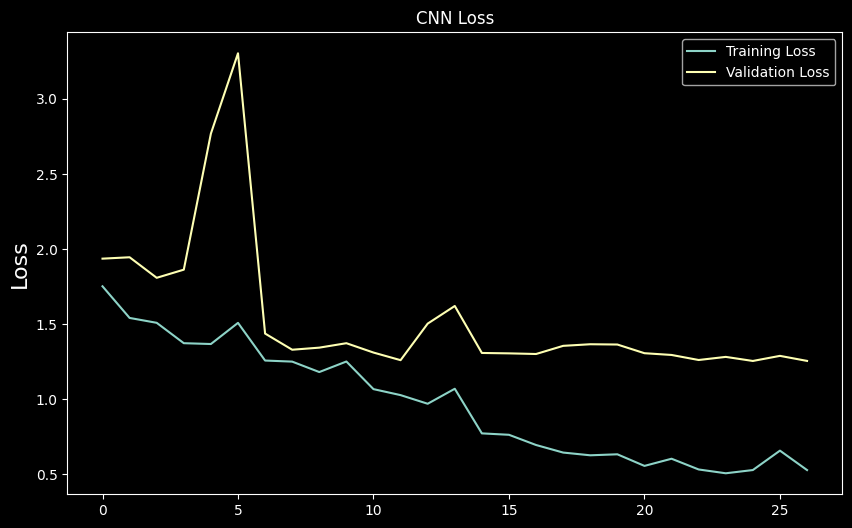

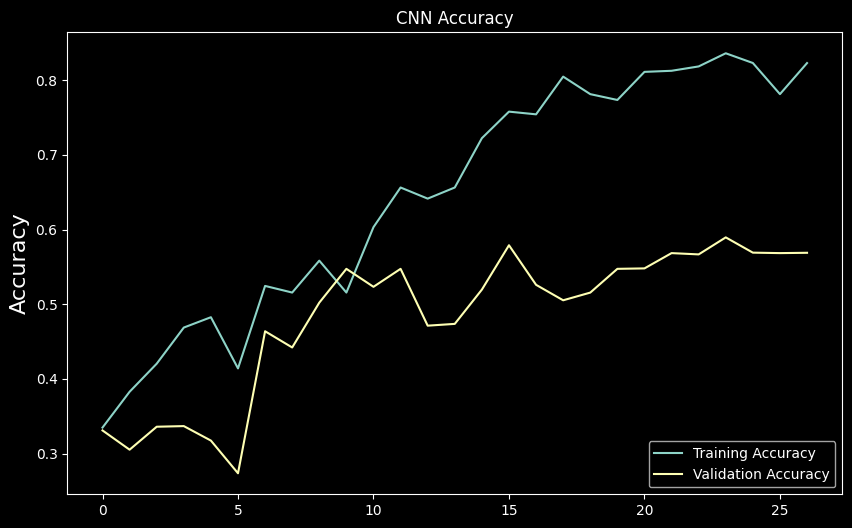

In [24]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "cnn"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "CNN_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "CNN_Accuracy.png")
plt.show()
